In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches
from skimage import measure
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from skimage import io
from skimage.feature import greycomatrix, greycoprops

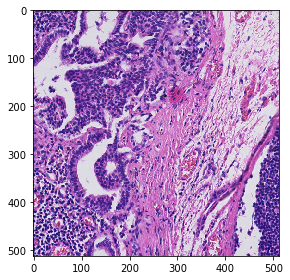

In [2]:
image = io.imread("dataset045/有癌细胞/01_17_22.png")
io.imshow(image)

In [3]:
PATCH_SIZE = 128

cancer_locations = [(10, 210), (110, 100), (170, 140), (80, 270)]
cancer_patches = []
for loc in cancer_locations:
    cancer_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

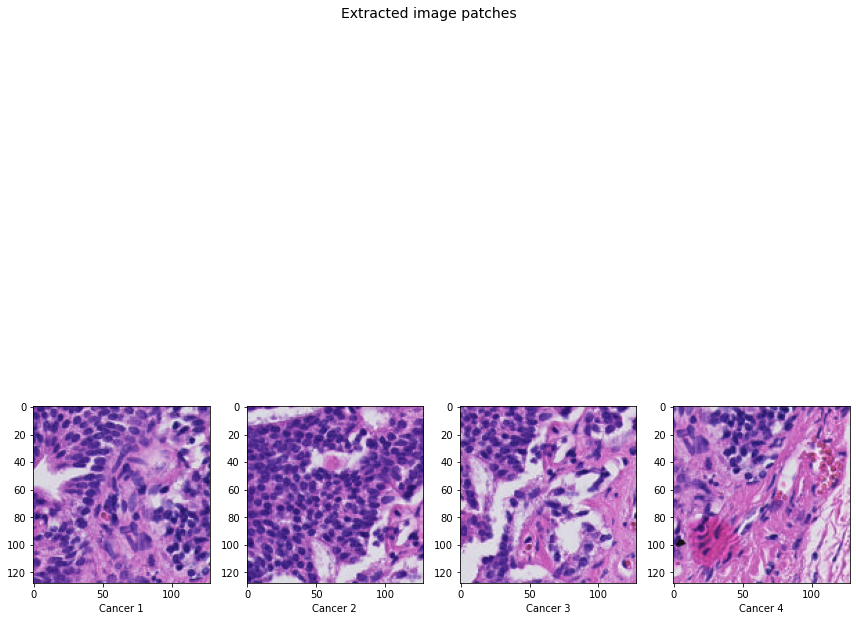

In [4]:
fig = plt.figure(figsize=(12, 12))

for i, patch in enumerate(cancer_patches):
    ax = fig.add_subplot(1, len(cancer_patches), i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cancer %d' % (i + 1))
# display the patches and plot
fig.suptitle('Extracted image patches', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [5]:
from skimage import filters
from skimage import feature
blobs_log = feature.blob_log(rgb2gray(cancer_patches[1]), max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * math.sqrt(2)

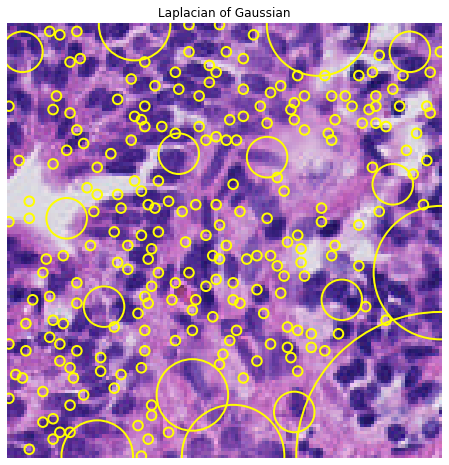

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title('Laplacian of Gaussian')
ax.imshow(cancer_patches[0])
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    ax.add_patch(c)
    ax.set_axis_off()
    
plt.show()

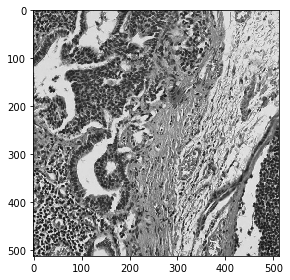

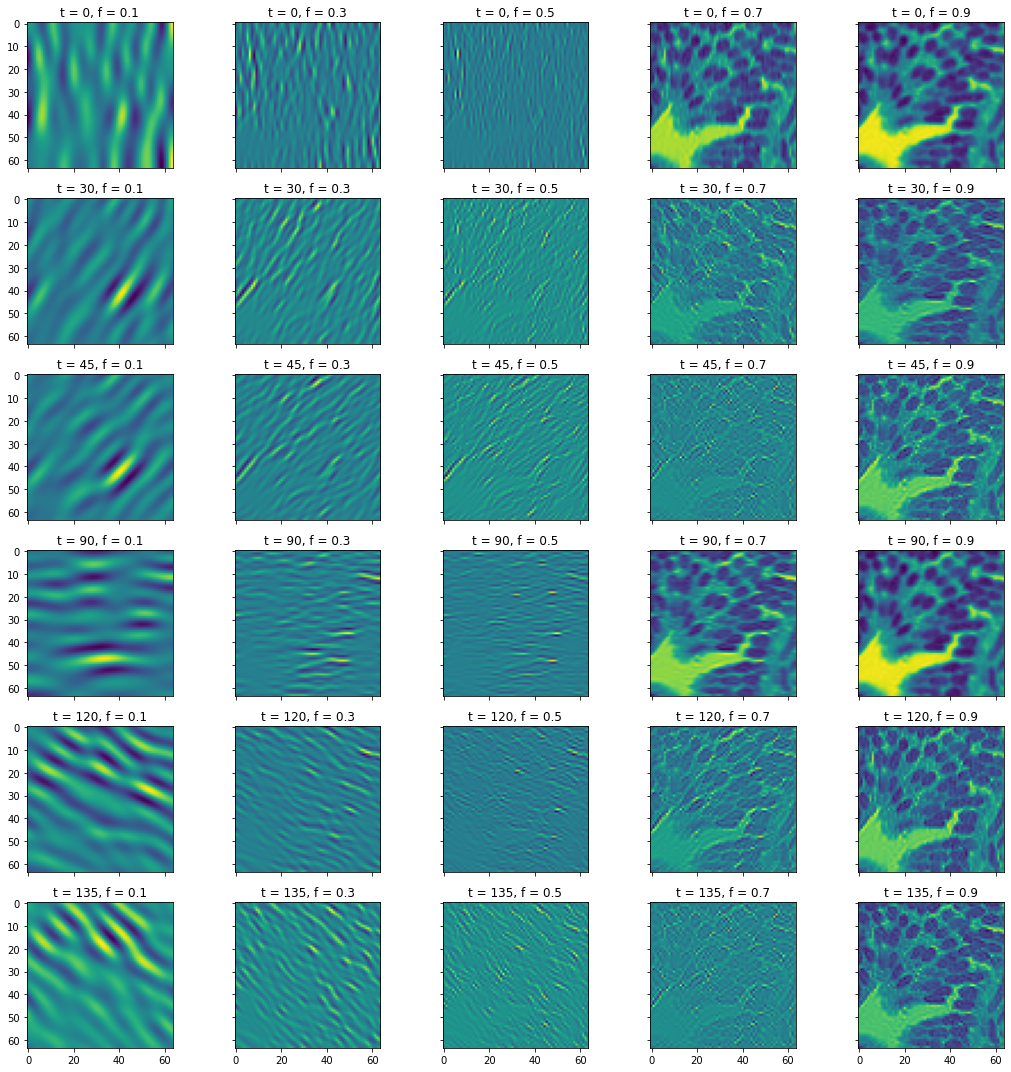

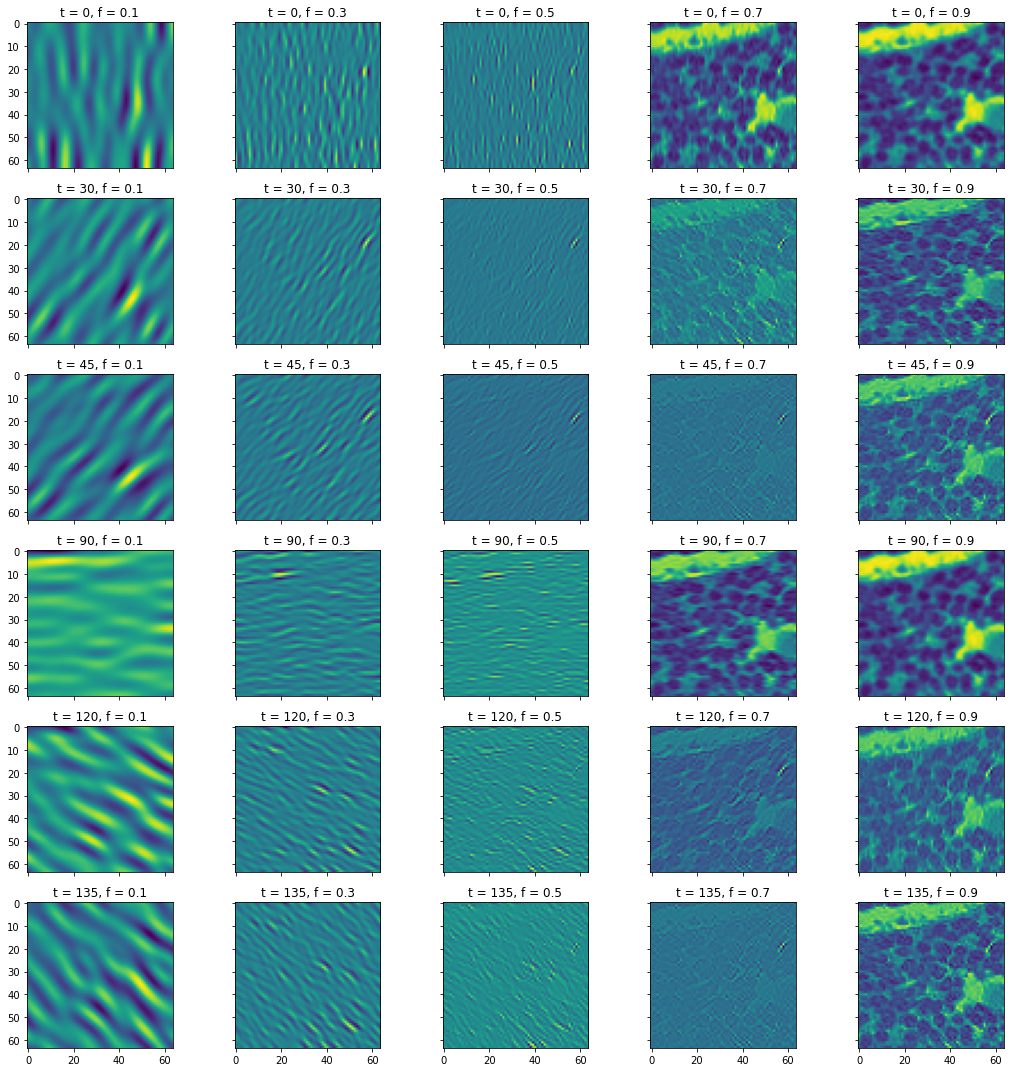

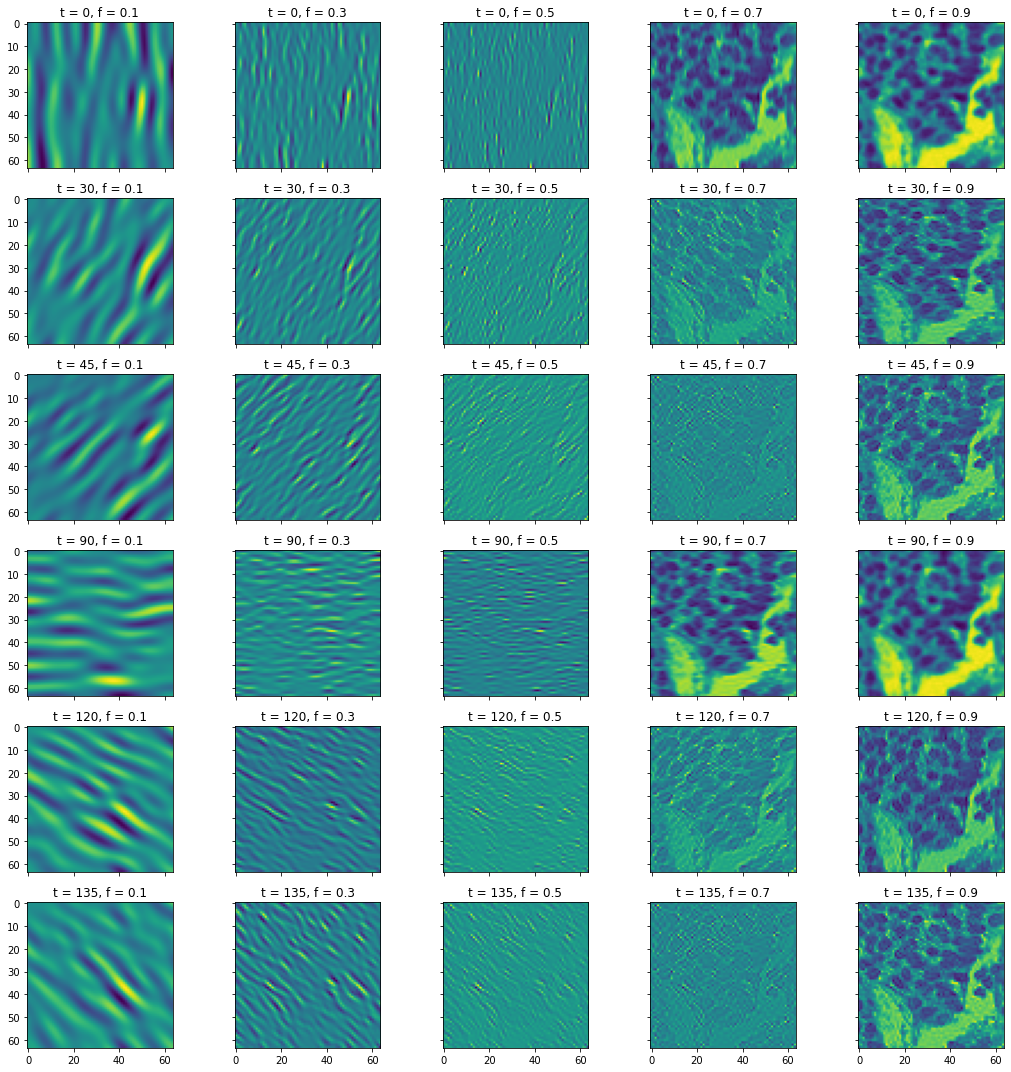

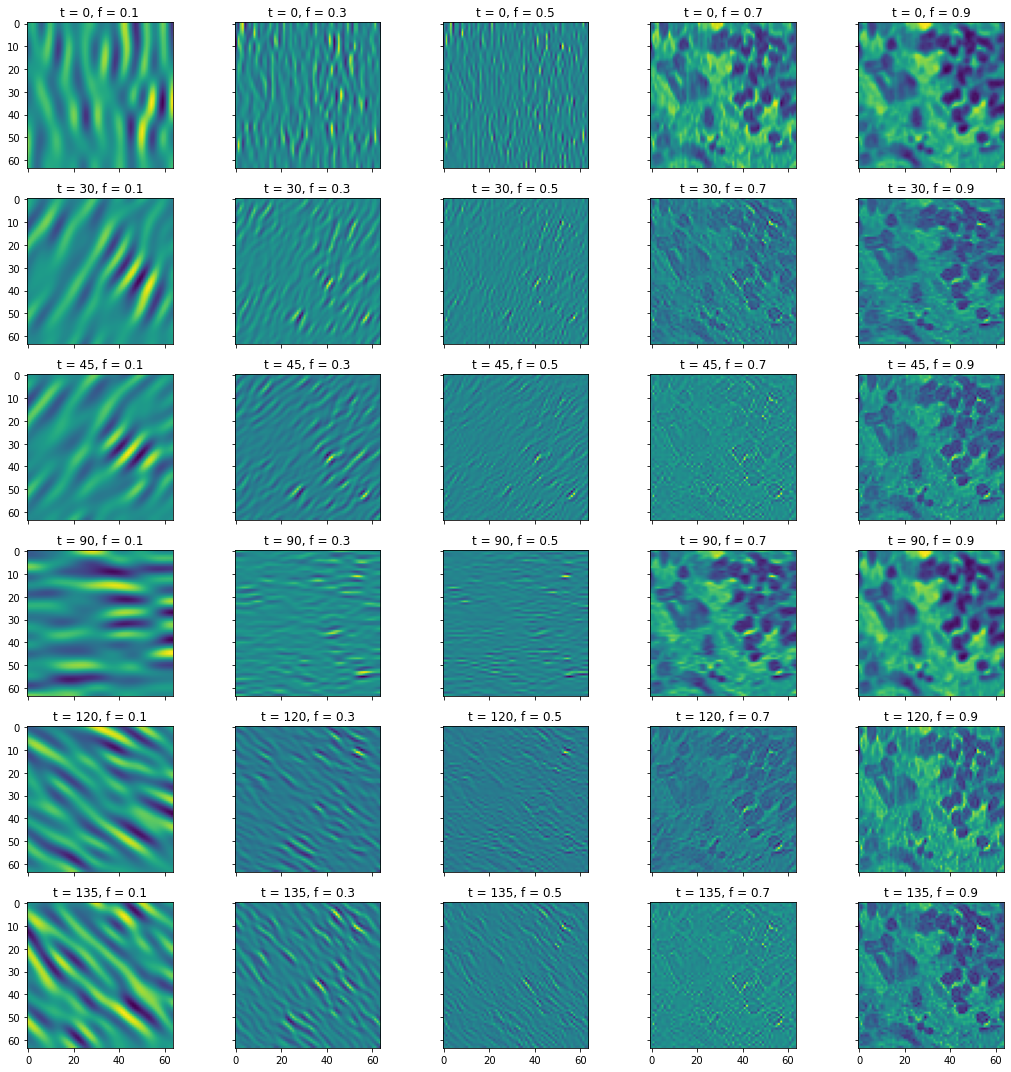

In [7]:
from skimage.filters import gabor
from skimage import data, io
from matplotlib import pyplot as plt  # doctest: +SKIP
from math import pi
image = io.imread("dataset045/有癌细胞/01_17_22.png", as_gray = True)

PATCH_SIZE = 64

cancer_locations = [(10, 210), (110, 100), (170, 140), (80, 270)]
cancer_patches = []
for loc in cancer_locations:
    cancer_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

plt.figure()
io.imshow(image)

the_str = ["0", "30", "45", "90", "120", "135"]
theta = [0, pi/6, pi/4, pi/2, 2*pi/3, 3*pi/4]
frequency = [0.1, 0.3, 0.5, 0.7, 0.9]
n = len(frequency)

for patch in cancer_patches:
    fig, axes = plt.subplots(len(theta), len(frequency), figsize=(15, 15), sharex=True, sharey=True)
    ax = axes.ravel()
    for i in range(0, len(theta)):
        for j in range(0, len(frequency)):
            filt_real, filt_imag = gabor(patch, theta = theta[i], frequency=frequency[j])
            ax[n*i + j].imshow(filt_real)
            ax[n*i + j].set_title("t = " + the_str[i] + ", f = " + str(round(frequency[j], 2)) )


    fig.tight_layout()
   


[   0    0    0    0    0    0    0    0    0    0    0  289 1124  841
  812  443  152  423   12    0]
[  0   0   0   0   0   0   0   0   0   0   0   0  35 278 544 443 368 301
 352 355]
[   0    0    0    0    0    0    0    0    0   12 2398 1611   75    0
    0    0    0    0    0    0]
[  0   0   0   0   0   0   0   0   0   0   0   0  36 285 547 440 365 311
 349 359]
[   0    0    0    0    0    0    0    0    0   19 3073 1004    0    0
    0    0    0    0    0    0]
[  0   0   0   0   0   0   0   0   0   0   0   0  40 303 546 448 355 318
 353 359]
[   0    0    0    0    0    0    0    0    0    0    0  292 1121  849
  806  435  158  422   13    0]
[  0   0   0   0   0   0   0   0   0   0   0   0  35 278 544 443 368 301
 352 355]
[   0    0    0    0    0    0    0    0    0    3 2429 1628   36    0
    0    0    0    0    0    0]
[  0   0   0   0   0   0   0   0   0   0   0   0  36 288 545 439 365 309
 352 359]
[   0    0    0    0    0    0    0    0    0   16 3085  994    1    0

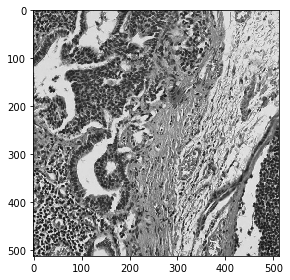

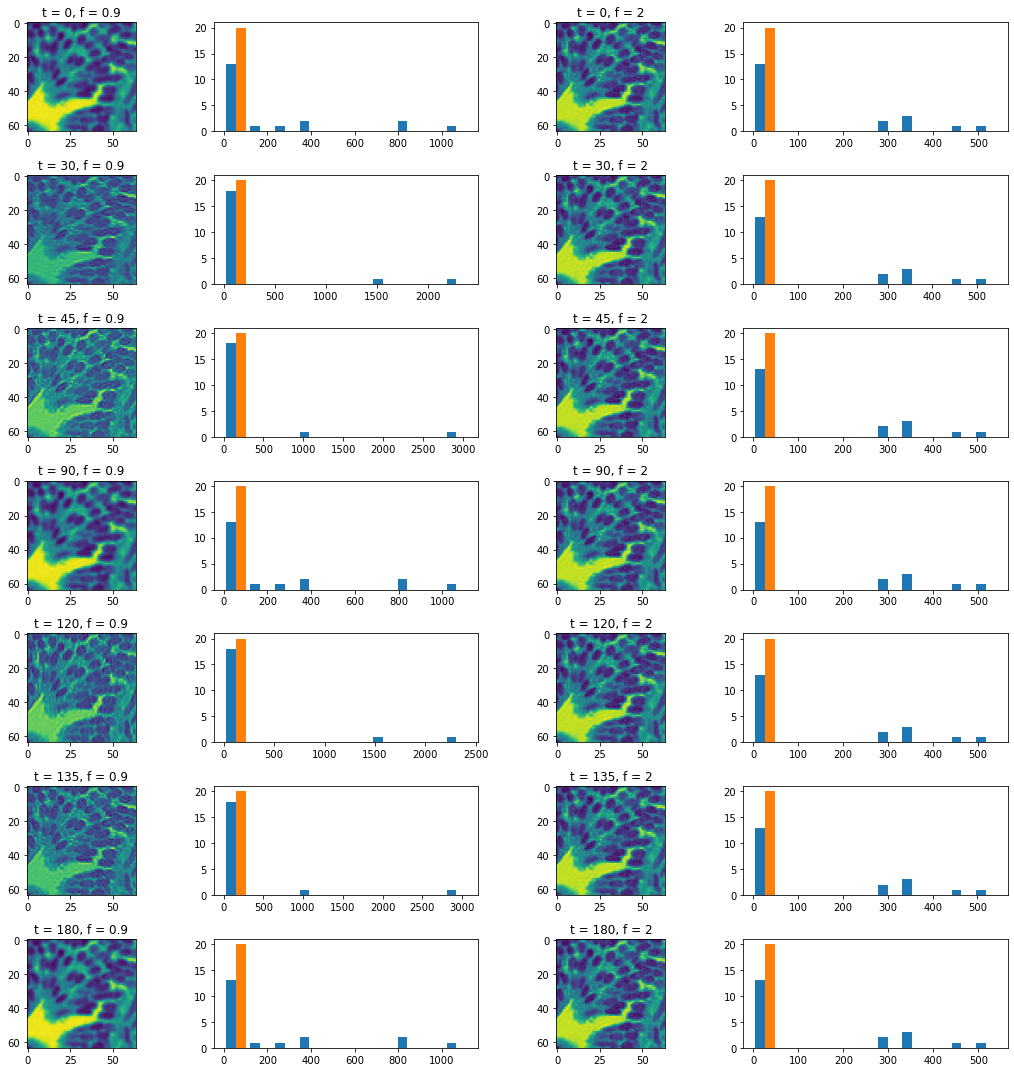

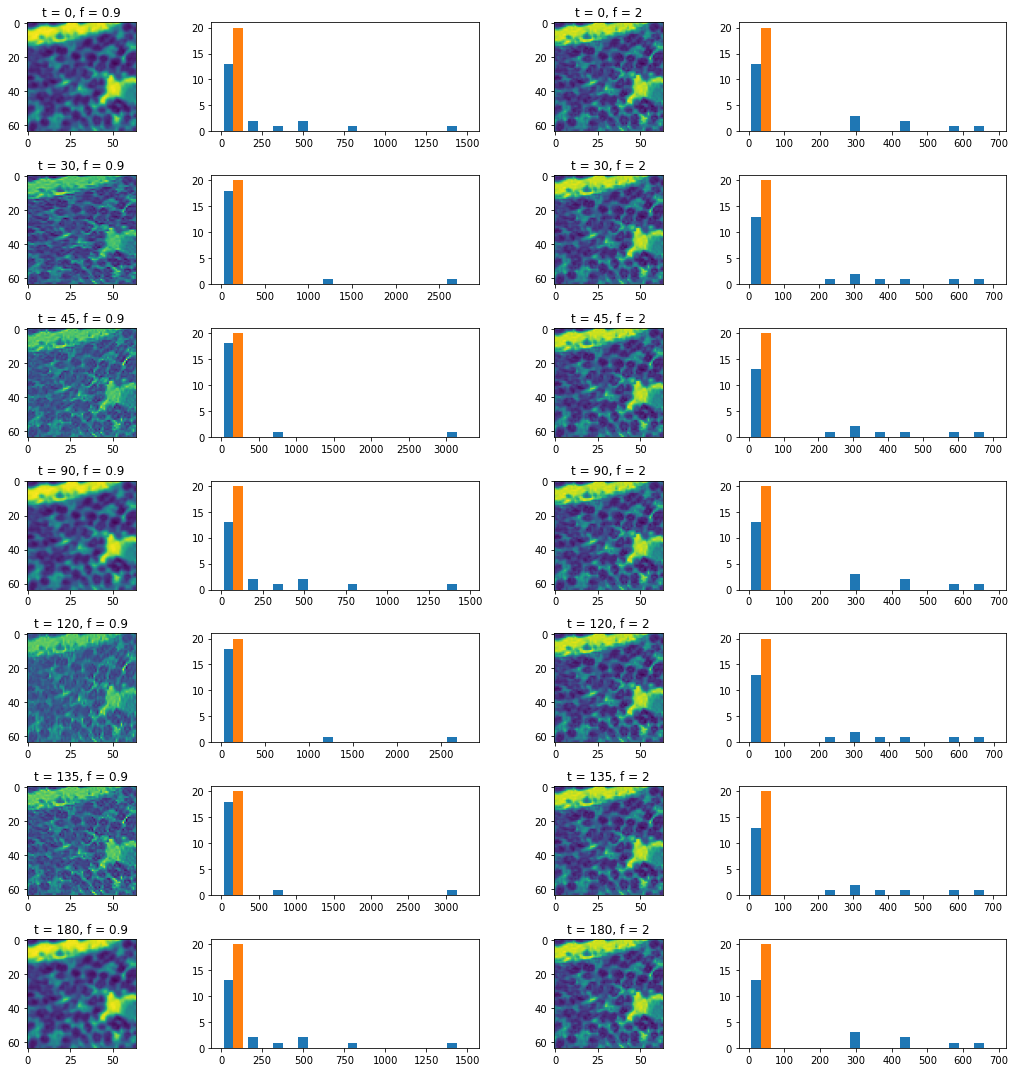

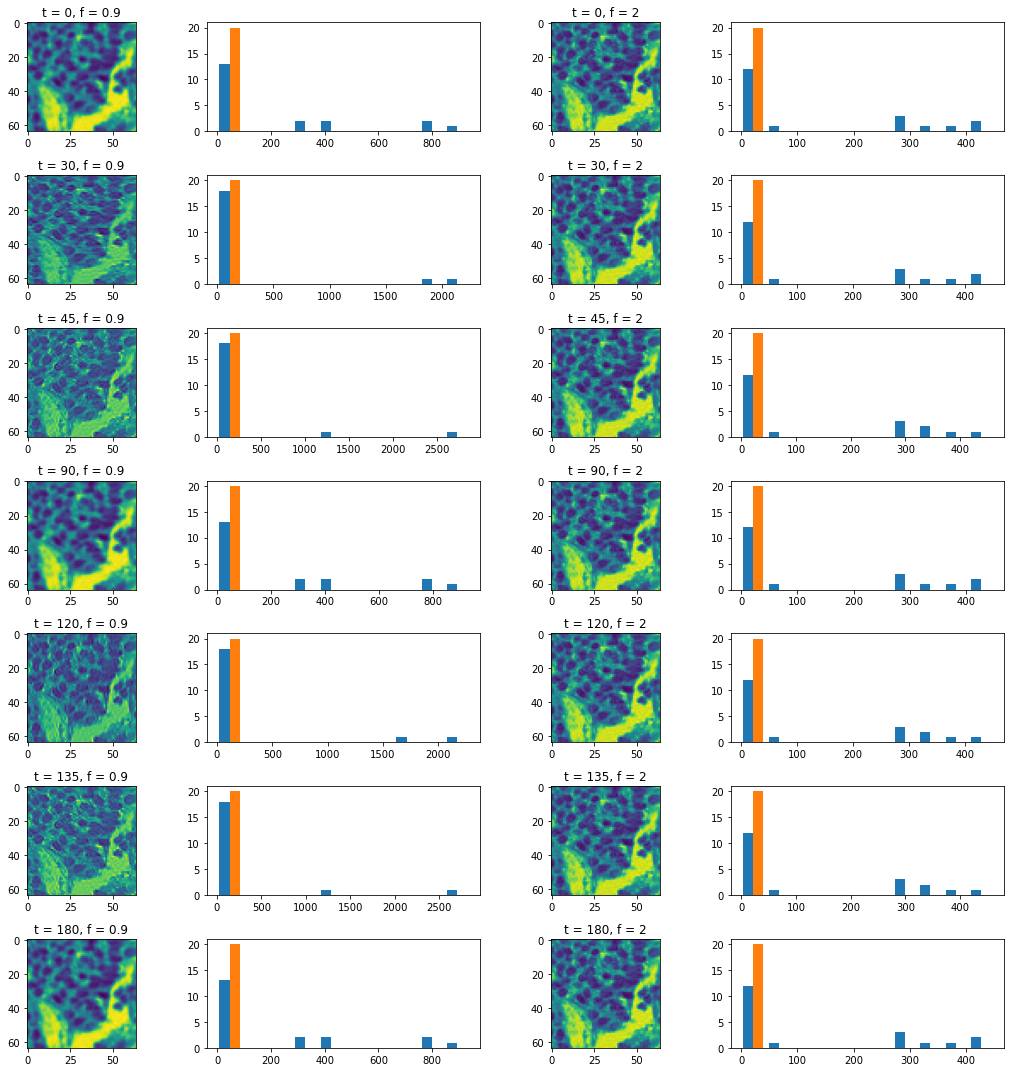

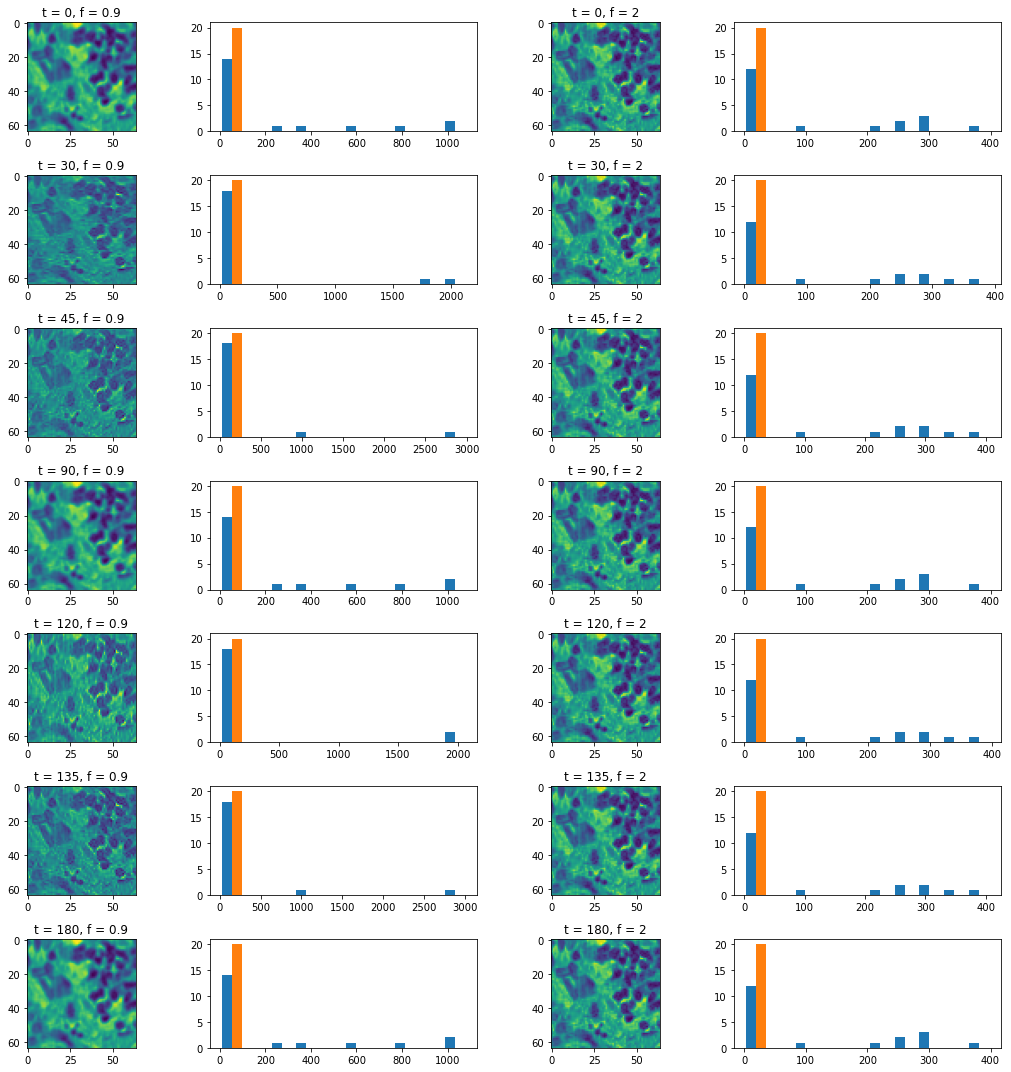

In [18]:
from skimage.filters import gabor
from skimage import data, io, exposure
from matplotlib import pyplot as plt  # doctest: +SKIP
from math import pi
image = io.imread("dataset045/有癌细胞/01_17_22.png", as_gray = True)

PATCH_SIZE = 64

cancer_locations = [(10, 210), (110, 100), (170, 140), (80, 270)]
cancer_patches = []
for loc in cancer_locations:
    cancer_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

plt.figure()
io.imshow(image)

the_str = ["0", "30", "45", "90", "120", "135", "180"]
theta = [0, pi/6, pi/4, pi/2, 2*pi/3, 3*pi/4, pi]
frequency = [0.9, 2]
n = len(frequency)*2

for patch in cancer_patches:
    fig, axes = plt.subplots(len(theta), len(frequency)*2, figsize=(15, 15), sharex=True, sharey=True)
    ax = axes.ravel()
    for i in range(0, len(theta)):
        for j in range(0, len(frequency)):
            filt_real, filt_imag = gabor(patch, theta = theta[i], frequency=frequency[j])
            
            plt.subplot(len(theta), len(frequency)*2, n*i + 2*j+1)
            plt.imshow(filt_real)
            plt.title("t = " + the_str[i] + ", f = " + str(round(frequency[j], 2)) )
            
            plt.subplot(len(theta), len(frequency)*2, n*i + 2*j + 2)
            
            #img_eq = exposure.equalize_hist(filt_real)
            # 8 / 10
            [counts, bins] = exposure.histogram(filt_real,nbins=20,source_range='dtype',normalize=False)
            v = counts.flatten()
            print(v)
            
            #plt.hist(filt_real)
            
            plt.hist([counts,bins])
            
            #plt.hist(img_eq)


    fig.tight_layout()
   
